## Sequential Forward Floating Selection (SFS)

In [1]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector

### Import dataset

In [2]:
df = pd.read_csv("Finaltest.csv")

In [3]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,date_registration,date_unregistration,final_result
0,1,1,24213,0,0,2,4,0,0,90,...,0,0,0,0,0,0,0,-128,-46,0
1,1,1,40419,1,1,1,2,1,0,60,...,4,3,2,1,3,14,10,-46,171,0
2,1,1,41060,1,2,3,7,0,0,60,...,34,2,5,0,22,87,6,-24,0,1
3,1,1,43284,1,1,1,8,0,2,180,...,47,22,9,2,32,87,36,-28,226,0
4,1,1,45664,1,3,3,6,0,1,60,...,27,0,6,2,54,123,64,-31,0,1


### Drop columns

In [4]:
#df=df.drop(columns='id_student')
df=df.drop(columns='code_module')
df=df.drop(columns='code_presentation')
df=df.drop(columns='date_unregistration')
df=df.drop(columns='date_registration')

In [5]:
df.shape

(1303, 23)

In [6]:
df.isnull().sum()

id_student               0
gender                   0
region                   0
highest_education        0
imd_band                 0
age_band                 0
num_of_prev_attempts     0
studied_credits          0
disability               0
total_number_of_click    0
total_score              0
externalquiz             0
forumng                  0
glossary                 0
homepage                 0
oucontent                0
ouelluminate             0
ouwiki                   0
page                     0
resource                 0
subpage                  0
url                      0
final_result             0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,final_result


In [8]:
X = df.iloc[:,0:22]
y = df.iloc[:,-1]

In [9]:
X

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2693243,0,3,1,5,1,0,60,0,2643,...,310,1,163,31,9,24,1,101,360,200
1299,2694933,0,1,2,1,0,0,60,1,935,...,87,0,76,19,16,14,1,45,81,30
1300,2697773,0,0,2,6,0,0,60,0,148,...,14,0,7,1,0,3,2,6,35,18
1301,2707979,0,1,1,6,0,0,120,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y

0       0
1       0
2       1
3       0
4       1
       ..
1298    1
1299    1
1300    1
1301    1
1302    1
Name: final_result, Length: 1303, dtype: int64

In [11]:
X.head()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64


### Train and Fit dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

### Sequential Forward Floating Selection

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
X_train.shape

(912, 22)

In [15]:
forward_feature_selection = SequentialFeatureSelector(DecisionTreeClassifier(),
                                                     k_features=22,
                                                     forward=True,
                                                     floating=True,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)
forward_feature_selection.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2022-11-03 01:31:04] Features: 1/22 -- score: 0.8456042734185905[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished

[2022-11-03 01:31:04] Features: 2/22 -- score: 0.8546404800406704[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jo

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-11-03 01:31:09] Features: 10/22 -- score: 0.840881768991237[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-11-03 01:31:09] Features: 11/22 -- score: 0.8495524099655093[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished

[2022-11-03 01:31:16] Features: 16/22 -- score: 0.8430757146366818[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2022-11-03 01:31:16] Features: 17/22 -- score: 0.8362008995702246[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s finished

[2022-11-03 01:31:25] Features: 20/22 -- score: 0.825464832048211[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished

[2022-11-03 01:31:25] Features: 21/22 -- score: 0.8328520069690004[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

{1: {'feature_idx': (10,),
  'cv_scores': array([0.87610619, 0.80542986, 0.84210526, 0.8558952 , 0.84848485]),
  'avg_score': 0.8456042734185905,
  'feature_names': ('total_score',)},
 2: {'feature_idx': (10, 18),
  'cv_scores': array([0.84070796, 0.85217391, 0.85462555, 0.85344828, 0.8722467 ]),
  'avg_score': 0.8546404800406704,
  'feature_names': ('total_score', 'page')},
 3: {'feature_idx': (3, 10, 18),
  'cv_scores': array([0.83842795, 0.83116883, 0.86842105, 0.86956522, 0.86725664]),
  'avg_score': 0.854967937191622,
  'feature_names': ('highest_education', 'total_score', 'page')},
 4: {'feature_idx': (3, 5, 10, 18),
  'cv_scores': array([0.85840708, 0.82251082, 0.86343612, 0.85964912, 0.8722467 ]),
  'avg_score': 0.8552499688694235,
  'feature_names': ('highest_education', 'age_band', 'total_score', 'page')},
 5: {'feature_idx': (3, 5, 10, 13, 18),
  'cv_scores': array([0.86343612, 0.84482759, 0.85333333, 0.85344828, 0.85217391]),
  'avg_score': 0.8534438463587589,
  'feature_na

In [16]:
forward_feature_selection.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)

In [17]:
forward_feature_selection.k_feature_names_

('id_student',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'studied_credits',
 'disability',
 'total_number_of_click',
 'total_score',
 'externalquiz',
 'forumng',
 'glossary',
 'homepage',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'resource',
 'subpage',
 'url')

In [18]:
forward_feature_selection.k_score_

0.8351281680911651

In [19]:
download=pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
download.to_csv("forwardfloating.decisiontree.csv")
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.8761061946902654, 0.8054298642533937, 0.842...",0.845604,"(total_score,)",0.029705,0.023112,0.011556
2,"(10, 18)","[0.8407079646017699, 0.8521739130434782, 0.854...",0.85464,"(total_score, page)",0.013001,0.010115,0.005058
3,"(3, 10, 18)","[0.8384279475982532, 0.8311688311688311, 0.868...",0.854968,"(highest_education, total_score, page)",0.021392,0.016644,0.008322
4,"(3, 5, 10, 18)","[0.8584070796460177, 0.8225108225108225, 0.863...",0.85525,"(highest_education, age_band, total_score, page)",0.021941,0.017071,0.008535
5,"(3, 5, 10, 13, 18)","[0.8634361233480177, 0.8448275862068965, 0.853...",0.853444,"(highest_education, age_band, total_score, glo...",0.007619,0.005928,0.002964
6,"(3, 5, 8, 10, 13, 18)","[0.8672566371681415, 0.8235294117647058, 0.853...",0.852007,"(highest_education, age_band, disability, tota...",0.022925,0.017837,0.008918
7,"(3, 5, 6, 8, 10, 13, 18)","[0.8584070796460177, 0.829059829059829, 0.8370...",0.845649,"(highest_education, age_band, num_of_prev_atte...",0.018577,0.014453,0.007227
8,"(1, 3, 6, 8, 10, 13, 15, 17)","[0.8622222222222222, 0.8523206751054853, 0.839...",0.851533,"(gender, highest_education, num_of_prev_attemp...",0.010158,0.007903,0.003952
9,"(1, 3, 6, 8, 10, 13, 15, 17, 18)","[0.8521739130434782, 0.8523206751054853, 0.847...",0.85049,"(gender, highest_education, num_of_prev_attemp...",0.005119,0.003983,0.001992
10,"(1, 3, 5, 6, 8, 10, 15, 16, 18, 21)","[0.851063829787234, 0.8264462809917354, 0.8185...",0.840882,"(gender, highest_education, age_band, num_of_p...",0.019893,0.015478,0.007739


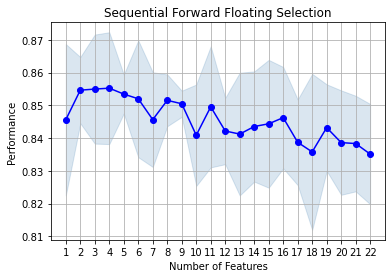

In [20]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Floating Selection')
plt.grid()
plt.show()

In [21]:
forward_feature_selection = SequentialFeatureSelector(DecisionTreeClassifier(),
                                                     k_features= (1,22),
                                                     forward=True,
                                                     floating=True,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2022-11-03 01:31:31] Features: 1/22 -- score: 0.8456042734185905[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished

[2022-11-03 01:31:31] Features: 2/22 -- score: 0.8551437324897535[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jo

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2022-11-03 01:31:37] Features: 12/22 -- score: 0.8421739062070379[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.3s finished

[2022-11-03 01:31:45] Features: 18/22 -- score: 0.8337520766246393[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished

[2022-11-03 01:31:45] Features: 19/22 -- score: 0.8348308284772579[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

In [22]:
forward_feature_selection.k_feature_names_

('total_score', 'page')

In [23]:
forward_feature_selection.k_score_

0.8551437324897535

In [24]:

pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.8761061946902654, 0.8054298642533937, 0.842...",0.845604,"(total_score,)",0.029705,0.023112,0.011556
2,"(10, 18)","[0.8482142857142857, 0.8521739130434782, 0.854...",0.855144,"(total_score, page)",0.008264,0.00643,0.003215
3,"(3, 10, 18)","[0.8521739130434782, 0.8311688311688311, 0.868...",0.85277,"(highest_education, total_score, page)",0.018039,0.014035,0.007017
4,"(3, 5, 10, 18)","[0.8458149779735683, 0.8189655172413793, 0.863...",0.851033,"(highest_education, age_band, total_score, page)",0.02351,0.018291,0.009146
5,"(3, 5, 10, 13, 18)","[0.8584070796460177, 0.8412017167381973, 0.872...",0.85501,"(highest_education, age_band, total_score, glo...",0.014246,0.011084,0.005542
6,"(3, 5, 8, 10, 13, 18)","[0.8596491228070174, 0.8101265822784811, 0.841...",0.845425,"(highest_education, age_band, disability, tota...",0.026,0.020229,0.010114
7,"(3, 5, 8, 10, 11, 18, 21)","[0.849785407725322, 0.8461538461538463, 0.8290...",0.846117,"(highest_education, age_band, disability, tota...",0.013113,0.010203,0.005101
8,"(3, 5, 8, 10, 11, 13, 18, 21)","[0.849785407725322, 0.832618025751073, 0.83193...",0.848158,"(highest_education, age_band, disability, tota...",0.018256,0.014204,0.007102
9,"(3, 5, 8, 10, 11, 13, 18, 19, 21)","[0.8270042194092827, 0.8416666666666667, 0.834...",0.841283,"(highest_education, age_band, disability, tota...",0.020561,0.015997,0.007999
10,"(3, 5, 8, 9, 10, 11, 13, 18, 19, 21)","[0.8354430379746834, 0.8464730290456433, 0.836...",0.840857,"(highest_education, age_band, disability, tota...",0.027351,0.02128,0.01064


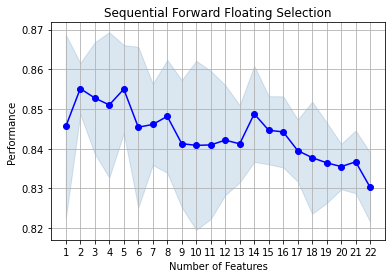

In [25]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Floating Selection')
plt.grid()
plt.show()